<a href="https://colab.research.google.com/github/jhlopesalves/statswithpython/blob/main/types_of_probability_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The necessary libraries for the statistical analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Normal (Gaussian) Distribution: A Cornerstone of Statistics

The **Normal Distribution**, often affectionately called the **Gaussian Distribution** or the **"bell curve"**, is a fundamental concept in probability theory and statistics. It's a **continuous probability distribution**, meaning that the variable can take on any value within a given range. Its shape and characteristics are entirely determined by just two parameters:

*   **Mean ($\mu$)**: This is the center of the distribution. It represents the average value of the data and also where the peak of the bell curve is located.
*   **Standard Deviation ($\sigma$)**: This measures the spread or dispersion of the data around the mean. A smaller standard deviation means the data points are clustered closely around the mean, resulting in a tall and narrow bell curve. A larger standard deviation indicates that the data points are more spread out, leading to a flatter and wider curve.

The probability density function (PDF) of the Normal Distribution is given by the formula:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

This formula describes the height of the curve at any given point $x$. The higher the value of $f(x)$, the more likely it is to observe a value around $x$.

### Key Properties of the Normal Distribution

Understanding these properties is crucial for working with normally distributed data:

*   **Symmetric about the Mean:** The bell curve is perfectly symmetrical around its mean ($\mu$). This means that the left side of the curve is a mirror image of the right side.
*   **Mean, Median, and Mode are Identical:** In a perfect Normal Distribution, the mean, median (the middle value), and mode (the most frequent value) all coincide at the center of the distribution ($\mu$).
*   **Shape is the Classic "Bell Curve":** The distinctive bell shape is a visual hallmark of the normal distribution. It rises smoothly to a single peak at the mean and then tapers off symmetrically on both sides.
*   **Asymptotic to the x-axis:** The tails of the bell curve extend infinitely in both directions, getting closer and closer to the x-axis but never actually touching it. This signifies that there is a non-zero probability of observing any value, although the probability becomes extremely small for values far from the mean.
*   **The Empirical Rule (68-95-99.7 Rule):** This is a handy rule of thumb for understanding the spread of data in a normal distribution:
    *   Approximately **68%** of the data falls within one standard deviation ($\sigma$) of the mean ($\mu \pm \sigma$).
    *   Approximately **95%** of the data falls within two standard deviations ($2\sigma$) of the mean ($\mu \pm 2\sigma$).
    *   Approximately **99.7%** of the data falls within three standard deviations ($3\sigma$) of the mean ($\mu \pm 3\sigma$).
    This rule allows for quick estimations of probability and data dispersion.

### Theoretical Significance and Applications

The Normal Distribution isn't just a theoretical construct; it's incredibly important in many fields due to these key aspects:

*   **The Central Limit Theorem (CLT):** This is one of the most powerful theorems in statistics. It states that if you take many independent random samples from *any* population (regardless of its original distribution) and calculate the mean of each sample, the distribution of these sample means will tend to be normal, as the sample size increases. This is why the normal distribution appears so frequently in real-world data and is fundamental to many statistical tests.
*   **Foundational in Inferential Statistics:** A large portion of inferential statistics (making inferences or predictions about a population based on a sample) is built upon the assumption that the data, or the sampling distribution of a statistic (like the mean), is normally distributed. Many hypothesis tests (like t-tests and ANOVA) and the construction of confidence intervals rely on this assumption.
*   **Modeling Natural Phenomena:** Many natural phenomena are approximately normally distributed, such as heights, weights, blood pressure, measurement errors, and test scores. This makes the normal distribution a useful model for understanding and analyzing data in various scientific disciplines.
*   **Basis for Other Distributions:** The normal distribution serves as the foundation for several other important probability distributions used in statistics, such as the t-distribution, the chi-squared distribution, and the F-distribution.

In essence, the Normal Distribution is a cornerstone of statistical theory and practice. Its predictable properties and its emergence through the Central Limit Theorem make it an indispensable tool for data analysis, modeling, and inference across a wide range of applications.

### Sampling from a Normal Distribution

In [2]:
# Set random seed for reproducibility
random_generator = np.random.default_rng(seed=42)

# Parameters
mean = 0
std_deviation = 1
sample_size = 1000

# Generate normal distribution samples
samples = random_generator.normal(loc=mean, scale=std_deviation, size=sample_size)

### Analysing and Describing the Data

In [6]:
# Convert to DataFrame for easy analysis
df_samples = pd.DataFrame({'sample': samples})

# Basic statistics
statistics = df_samples['sample'].describe()
skewness = df_samples['sample'].skew()
kurtosis = df_samples['sample'].kurtosis()

print("Summary Statistics:")
display(statistics)
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# For an ideal normal distribution, skewness should be ≈ 0 and kurtosis ≈ 0 (excess kurtosis).

Summary Statistics:


,sample
count,1000.000000
mean,-0.028892
std,0.989217
min,-3.648413
25%,-0.696313
50%,0.006178
75%,0.589887
max,3.178854


Skewness: -0.0438
Kurtosis: 0.0919


### Plotting the Distribution

1.  **Histogram: Visualising Sample Frequencies**

    The series of vertical bars in the plot constitutes a histogram. A histogram is a fundamental graphical tool in statistics that provides an approximate representation of the distribution of numerical data. It operates by segmenting the data range into a series of intervals, known as bins (the number of which is specified by the `n_bins` variable), and then displaying the frequency or, as in this instance, the probability density of data points that fall into each bin.

    By setting `stat='density'`, the histogram is normalised. This means the height of the bars is adjusted such that the total area encompassed by all bars sums to unity (1). This normalisation is crucial because it allows the histogram to be directly compared with a probability density function (PDF), which also has a total area of 1 under its curve.

    * **Code Implementation:** `sns.histplot(df_samples['sample'], bins=n_bins, kde=True, stat='density', color='skyblue', edgecolor='black', ax=ax)`
        * `sns.histplot`: This function, part of the Seaborn visualisation library, is invoked to create the histogram.
        * `df_samples['sample']`: This argument directs the function to use the data contained within the 'sample' column of the pandas DataFrame named `df_samples`.
        * `bins=n_bins`: This parameter determines the number of discrete intervals (bins) into which the data range will be divided. The value is supplied by our predefined `n_bins` variable.
        * `kde=True`: This boolean argument instructs Seaborn to superimpose a Kernel Density Estimate (KDE) curve over the histogram, providing a smoothed representation of the data's distribution.
        * `stat='density'`: As mentioned, this parameter normalises the histogram. Instead of raw counts, the height of each bar represents the probability density for that bin.
        * `color='skyblue'`, `edgecolor='black'`: These parameters control the aesthetic appearance of the histogram, setting the fill colour of the bars to sky blue and their borders to black.
        * `ax=ax`: This assigns the generated histogram to a specific Matplotlib axes object, `ax`, allowing for more complex plot compositions.

2.  **Kernel Density Estimate (KDE): A Smoothed Distribution Curve**

    The smooth, continuous curve that generally follows the contours of the histogram bars is the Kernel Density Estimate (KDE). KDE is a sophisticated non-parametric technique employed to estimate the underlying probability density function (PDF) of a random variable from a finite data sample. It operates by placing a kernel function (typically a Gaussian or similar smooth, symmetric function) at each data point. These individual kernels are then summed and normalised to produce a continuous estimate of the density across the data range.

    The `kde=True` parameter within the `sns.histplot` function automatically generates and overlays this curve. The KDE offers a more nuanced and less noisy visualisation of the sample data's distribution compared to the somewhat blocky representation of the histogram, particularly when the sample size is not excessively large.

3.  **Theoretical Normal Probability Density Function (PDF): The Ideal Benchmark**

    The distinct red dashed line on the plot represents the theoretical Probability Density Function (PDF) of a Normal (or Gaussian) Distribution. This line is calculated based on the pre-specified `mean` ($\mu$) and `std_deviation` ($\sigma$) parameters that we assume define the ideal population from which our samples are drawn. The mathematical formula for the PDF of a Normal Distribution is:
$$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

Where:

 * $x$: Represents a value along the horizontal axis for which the probability density is being calculated.
    * $\mu$: Denotes the mean (average) of the distribution, which dictates the central location of the peak of the curve.
    * $\sigma$: Represents the standard deviation of the distribution, which quantifies the spread or dispersion of the data around the mean. A smaller $\sigma$ results in a taller, narrower curve, while a larger $\sigma$ leads to a shorter, wider curve.
    * $\sigma^2$: Is the variance of the distribution.
    * $\pi$: Is the mathematical constant pi (approximately 3.1415926535...).
    * $\exp(\cdot)$: Denotes the exponential function, $e^{(\cdot)}$, where $e$ is Euler's number (approximately 2.7182818284...).


 This formula precisely describes the characteristic symmetrical, bell-shaped curve associated with the Normal Distribution. By plotting this theoretical PDF alongside the histogram and KDE derived from our actual sample data, we can perform a qualitative visual assessment. This comparison helps us gauge how closely the distribution of our generated samples aligns with, or deviates from, a true Normal Distribution defined by the given mean and standard deviation. Discrepancies might suggest that the sample size is insufficient, that the data generation process is not perfectly Normal, or simply reflect the inherent randomness in sampling.

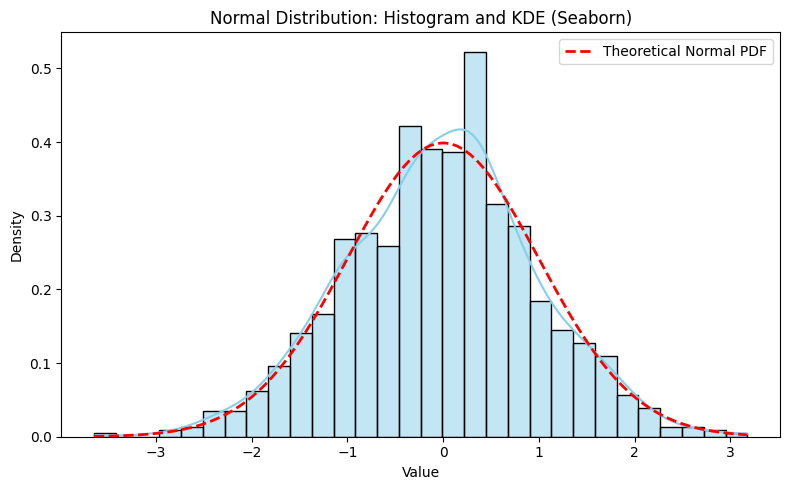

In [5]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Define variables for plotting
n_bins = 30  # Number of bins for the histogram
x_values = np.linspace(samples.min(), samples.max(), 100) # x-values for the theoretical PDF
theoretical_pdf = (1/(std_deviation * np.sqrt(2 * np.pi))) * np.exp(-((x_values - mean)**2 / (2 * std_deviation**2))) # Theoretical normal PDF

# Seaborn density plot (KDE) with histogram
sns.histplot(df_samples['sample'], bins=n_bins, kde=True, stat='density', color='skyblue', edgecolor='black', ax=ax)

# Theoretical normal curve for reference
ax.plot(x_values, theoretical_pdf, 'r--', linewidth=2, label='Theoretical Normal PDF')

ax.set_title('Normal Distribution: Histogram and KDE (Seaborn)')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend()
fig.tight_layout()
plt.show()